<center>

# __Linear models and Support Vector Machines__

November 14, 2023

<br>

__Computación Cuántica y Aprendizaje Máquina__

__Máster en Ciencia y Tecnologías de Información Cuántica (MQIST)__

<br>

Diego Alvarez-Estevez, PhD.

_Centro de Investigación en Tecnologías de la Información y las Comunicaciones (CITIC)_

_Universidade da Coruña_

</center>

## **Main objectives**

In this lab we will experiment by comparing the result of using different machine learning linear models (and kernel extensions) on data classification tasks. 

More specifically, for this task we will use as reference the well-known [IRIS classification dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This dataset contains information about three different types of Iris flowers - Iris Versicolor, Iris Virginica, and Iris Setosa, characterized by measurements of four variables (sepal length and width, and petal length and width). 

The Iris data set has a number of interesting features:

One of the classes (Iris Setosa) is linearly separable from the other two. However, the other two classes are not (fully) linearly separable. There is some overlap between the Versicolor and Virginica classes, so it is unlikely to achieve a perfect classification rate. 

There is some redundancy in the four input variables, so it is possible to achieve a good solution with only three of them, or even (not without some difficulty) from two, but the precise choice of the best combination of variables is not obvious.

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/1024px-Iris_dataset_scatterplot.svg.png)

For the development of the different machine learning models and compare the results of each method we will use [scikit-learn](https://scikit-learn.org/stable/index.html) (also known as sklearn) which is a free software machine learning library for the Python programming language.



## Part 1. Linear models

First of all, we will load the Iris dataset, select two out of the four features (so that data is representable using a 2D-graph), and plot the resulting data: 

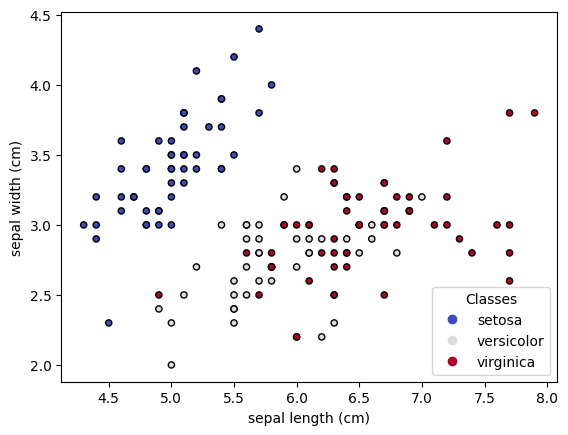

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

# Take the two out of the four features
selected_features = [0,1] # Select two from [0,1,2,3]
X = iris.data[:, selected_features]
y = iris.target

# Convert to binary problem (here by "selecting" two out of the three classes)
convert_to_binary = 0 # Select wheter to convert or not
if convert_to_binary == 1:
    class_to_remove = 0 # Select two from [0,1,2]
    y = y[np.where(iris.target != class_to_remove)]
    X = X[np.where(iris.target != class_to_remove)]

# Plot resulting dataset
X0, X1 = X[:, 0], X[:, 1]

_, ax = plt.subplots()

scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set(xlabel=iris.feature_names[selected_features[0]], ylabel=iris.feature_names[selected_features[1]])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Your tasks will be the following:

1. Get familiar with the code above and modify it to produce a "customized" version of the IRIS dataset, using two input features of your choice and two output classes that result in a linearly separable problem. Plot the resulting dataset. 

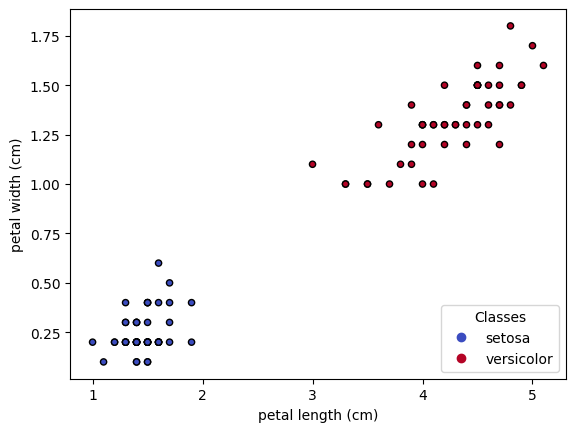

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

# Take the two out of the four features
selected_features = [2,3] # Select two from [0,1,2,3]`
selected_classes = [0,1]
X = np.array([x for i, x in enumerate(iris.data[:, selected_features]) if iris.target[i] in selected_classes])
y = np.array([x for x in iris.target if x in selected_classes])

# Convert to binary problem (here by "selecting" two out of the three classes)
convert_to_binary = 0 # Select wheter to convert or not
if convert_to_binary == 1:
    class_to_remove = 0 # Select two from [0,1,2]
    y = y[np.where(iris.target != class_to_remove)]
    X = X[np.where(iris.target != class_to_remove)]

# Plot resulting dataset
X0, X1 = X[:, 0], X[:, 1]

_, ax = plt.subplots()

scatter = ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set(xlabel=iris.feature_names[selected_features[0]], ylabel=iris.feature_names[selected_features[1]])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)


2. Train a logistic regression (LR) model using the whole custom dataset, plot the resulting decision boundary, and report the corresponding classification accuracy. Explore the multplie examples and documentation available at [scikit-learn](https://scikit-learn.org/stable/index.html) for this pourpose. A selection of possible interesting references is included at the end of this notebook.

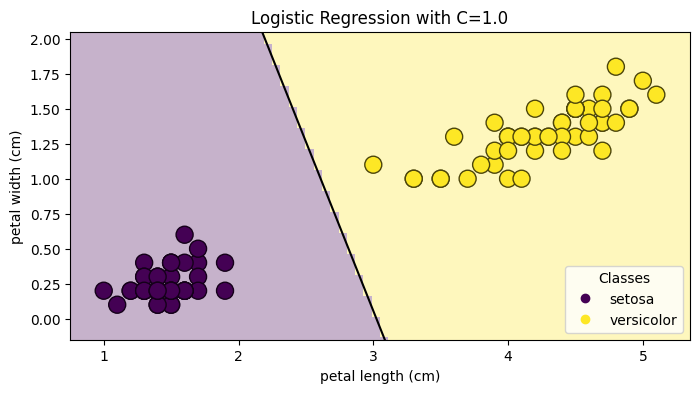

Classification Accuracy: 1.0


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import numpy as np

x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25

def plot_logistic_regression(lr_model, ax, C = 1.0, classes = 2):
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")

    common_params = {"estimator": lr_model, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    if classes == 2:
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[0],
            colors=["k"],
            linestyles=["solid"],
        )
    

    ax.set(xlabel=iris.feature_names[selected_features[0]], ylabel=iris.feature_names[selected_features[1]])
    ax.legend(scatter.legend_elements()[0], iris.target_names[selected_classes], loc="lower right", title="Classes")
    ax.set_title(f"Logistic Regression with C={C}")

    return lr_model.score(X, y)

# Settings for plotting
lr_model = LogisticRegression().fit(X, y)
_, ax = plt.subplots(figsize=(8, 4))
lr_accuracy = plot_logistic_regression(lr_model, ax)
plt.show()

print("Classification Accuracy:", lr_accuracy)

3. Now train a linear SVM. Notice in sklearn we have two options ([SVC with parameter "kernel=linear"](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)). Likewise, show the resulting decision boundary and the corresponding classification performance. Show, in addition, the corresponding "positive" and "negative" margins, and their associated "support vectors"

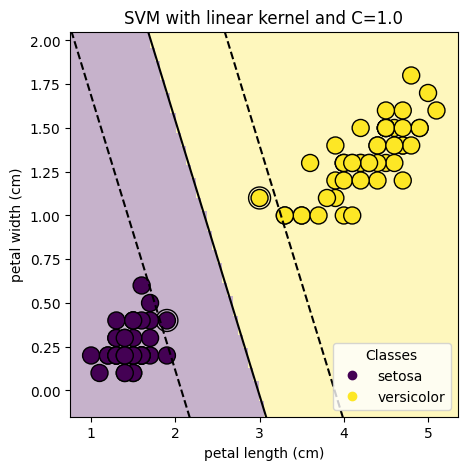

In [4]:
from sklearn.svm import SVC

def plot_svm(svm_model, kernel, ax, C=1.0, classes=2):
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": svm_model, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )   
    if classes == 2:
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
        )
        
        ax.scatter(
            svm_model.support_vectors_[:, 0],
            svm_model.support_vectors_[:, 1],
            s=250,
            facecolors="none",
            edgecolors="k",
        )
    # Plot samples by color and add legend
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=150, edgecolors="k")

    ax.set(xlabel=iris.feature_names[selected_features[0]], ylabel=iris.feature_names[selected_features[1]])
    ax.legend(scatter.legend_elements()[0], iris.target_names[selected_classes], loc="lower right", title="Classes")
    ax.set_title(f"SVM with {kernel} kernel and C={C}")

kernel = "linear"
svm_model = SVC(kernel=kernel, gamma=2).fit(X, y)
_, ax = plt.subplots(figsize=(5, 5))
plot_svm(svm_model, kernel, ax)
plt.show()


4. Experiment now with the regularization parameter "C", both for LR and linear SVM classifiers. Increase and decrease its value. What conclusions do we get?

Logistic Regression with (C=0.1) - Classification Accuracy: 1.0
Logistic Regression with (C=1) - Classification Accuracy: 1.0
Logistic Regression with (C=10) - Classification Accuracy: 1.0


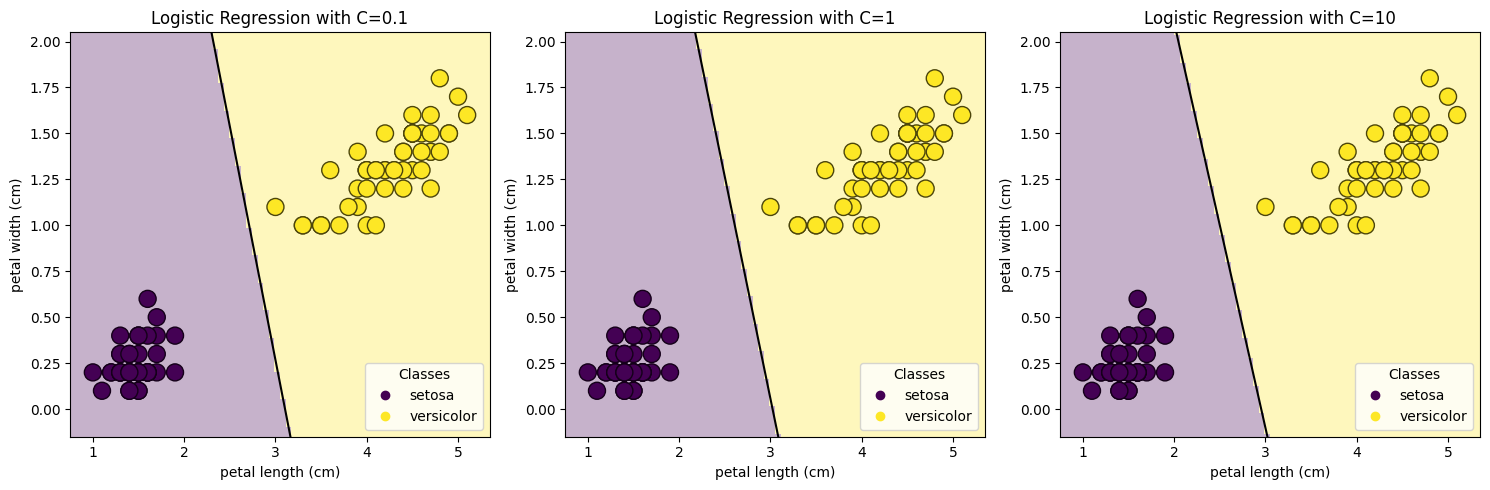

In [5]:
accuracies = {}

# Define a list of C values to experiment with
c_values = [0.1, 1, 10]

fig, axs = plt.subplots(1, len(c_values), figsize=(15, 5))

for i, c in enumerate(c_values):
    # Train logistic regression model with different C values
    lr_model = LogisticRegression(C=c).fit(X, y)

    accuracy = lr_model.score(X, y)
    print(f"Logistic Regression with (C={c}) - Classification Accuracy: {accuracy}")
    
    plot_logistic_regression(lr_model, axs[i], C=c)

plt.tight_layout()
plt.show()



SVM with linear kernel and C=0.1 - Classification Accuracy: 1.0
SVM with linear kernel and C=1 - Classification Accuracy: 1.0
SVM with linear kernel and C=10 - Classification Accuracy: 1.0


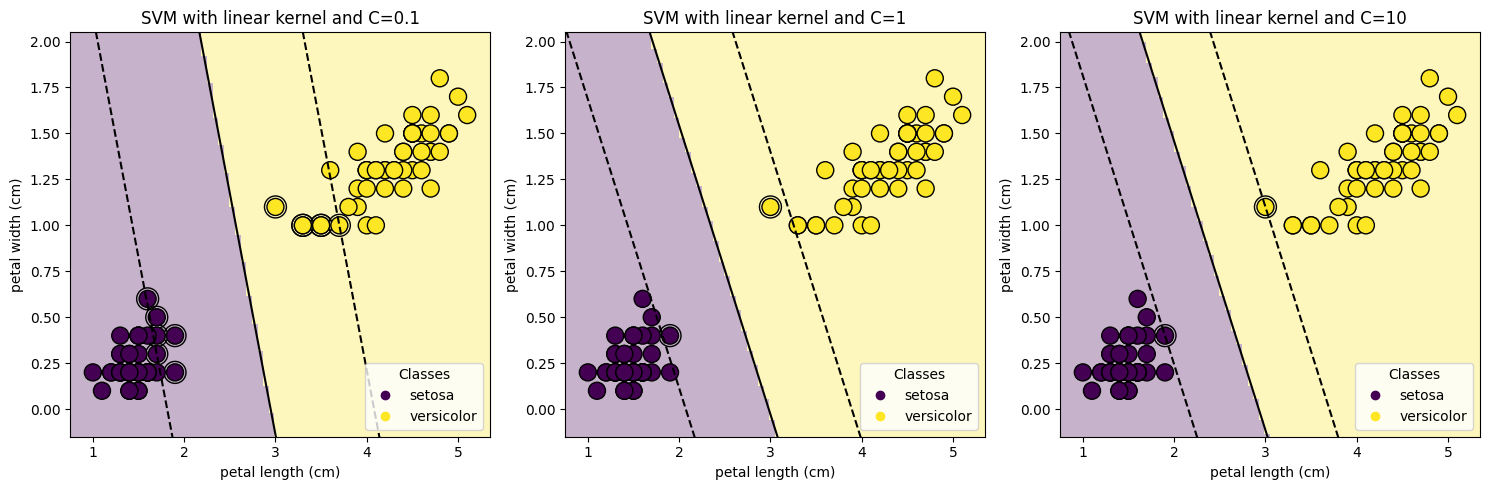

In [6]:
# Define a list of C values to experiment with
c_values = [0.1, 1, 10]

fig, axs = plt.subplots(1, len(c_values), figsize=(15, 5))

for i, c in enumerate(c_values):
    svm_model = SVC(kernel='linear', C=c).fit(X, y)

    accuracy = svm_model.score(X, y)
    print(f"SVM with linear kernel and C={c} - Classification Accuracy: {accuracy}")

    plot_svm(svm_model, 'linear', axs[i], C=c)

plt.tight_layout()
plt.show()

## Part 2. Non-linear SVMs

5. Using the same custom dataset as in previous exercises, train now two additional SVMs, respectively by using three-degree polynomial and Gaussian kernels. Show the corresponding decision boundaries, margins, and support vectors. Do we get any classification performance improvement with respect to their "linear" counterparts? 

Linear SVM with poly kernel - Classification Accuracy: 1.0
Linear SVM with rbf kernel - Classification Accuracy: 1.0


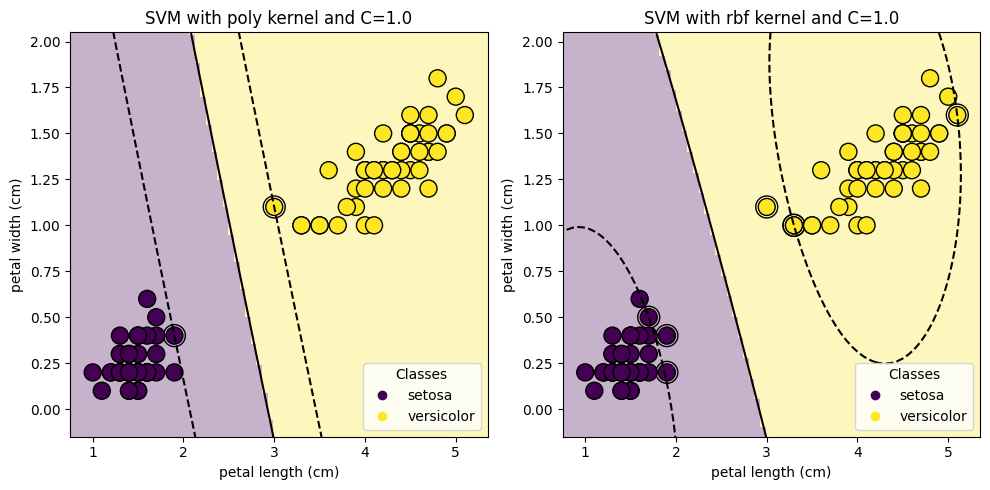

In [7]:
kernels = ["poly", "rbf"]

fig, axs = plt.subplots(1, len(kernels), figsize=(10, 5))

for i, kernel in enumerate(kernels):
    svm_model = SVC(kernel=kernel, degree=3).fit(X, y)

    accuracy = svm_model.score(X, y)
    print(f"Linear SVM with {kernel} kernel - Classification Accuracy: {accuracy}")

    plot_svm(svm_model, kernel, axs[i])

plt.tight_layout()
plt.show()


6. Rearrange now the dataset by keeping the same two input features, but now consider the original class labels (the problem hence becoming a three-class classification, instead of a binary one). Train LR, linear and kernelized SVMs. Plot the corresponding dataset and resulting decision boundaries (it is not necessary now to plot the margin and the support vectors). Which of the tested models gets the best performance?

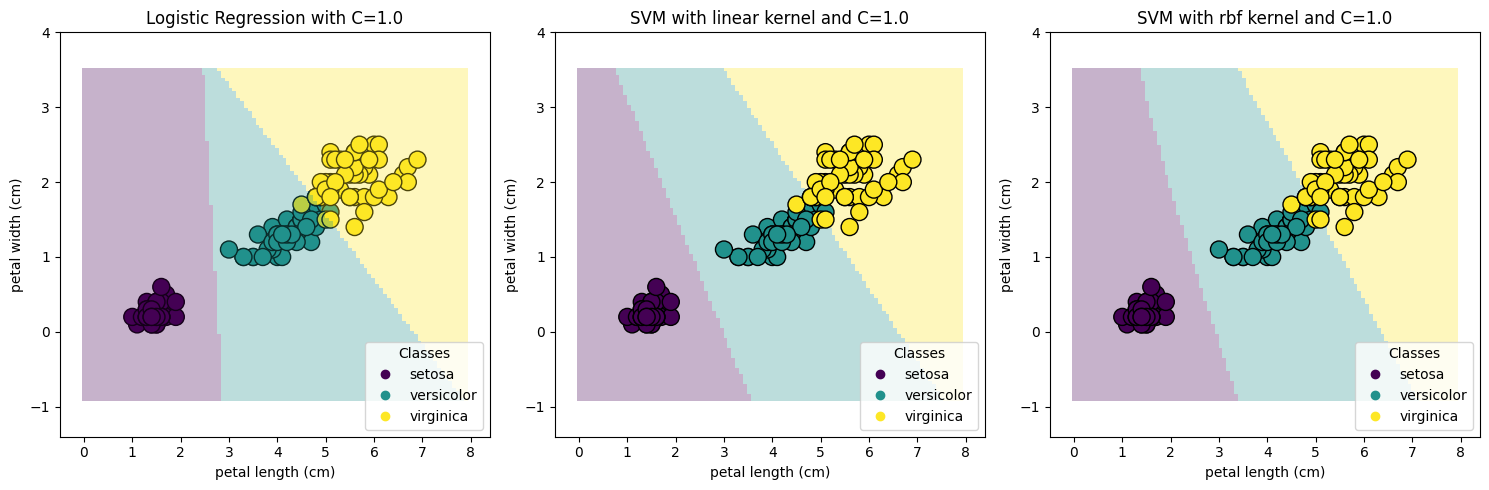

LR - Classification Accuracy: 0.9666666666666667
Linear SVM - Classification Accuracy: 0.9666666666666667
Kernel SVM - Classification Accuracy: 0.9533333333333334


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Change the selected classes here
selected_classes = [0,1,2]

X = iris.data[:, selected_features]
y = iris.target

kernels = ["linear", "rbf"]

# Train logistic regression model
lr_model = LogisticRegression(max_iter=120).fit(X, y)

# Train linear SVM model
linear_svm_model = SVC(kernel="linear").fit(X, y)

# Train kernelized SVM model
kernel_svm_model = SVC(kernel="rbf").fit(X, y)

_, axs = plt.subplots(1, 3, figsize=(15, 5))

x_min, x_max = X[:, 0].min() - 1.5, X[:, 0].max() + 1.5
y_min, y_max = X[:, 1].min() - 1.5, X[:, 1].max() + 1.5

plot_logistic_regression(lr_model, axs[0], classes=3)
plot_svm(linear_svm_model, "linear", axs[1], classes=3)
plot_svm(kernel_svm_model, "rbf", axs[2], classes=3)
plt.tight_layout()
plt.show()

lr_accuracy = lr_model.score(X, y)
print(f"LR - Classification Accuracy: {lr_accuracy}")

linear_svm_accuracy = linear_svm_model.score(X, y)
print(f"Linear SVM - Classification Accuracy: {linear_svm_accuracy}")

kernel_svm_accuracy = kernel_svm_model.score(X, y)
print(f"Kernel SVM - Classification Accuracy: {kernel_svm_accuracy}")

7. Finally, let us consider the full dataset (i.e. all the four features and three classes). Train LR, linear and kernelized SVMs. It is not necessary to provide any any plotting now, just carry out the experiments. Which of the models gets the best performance now?

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

X = iris.data
y = iris.target

# Train logistic regression model
lr_model = LogisticRegression(max_iter=120)
lr_model.fit(X, y)

# Train linear SVM model
linear_svm_model = SVC(kernel='linear')
linear_svm_model.fit(X, y)

# Train kernelized SVM model
kernel_svm_model = SVC(kernel='rbf')
kernel_svm_model.fit(X, y)

lr_accuracy = lr_model.score(X, y)
print(f"LR \t\t- Classification Accuracy: {lr_accuracy}")

linear_svm_accuracy = linear_svm_model.score(X, y)
print(f"Linear SVM \t- Classification Accuracy: {linear_svm_accuracy}")

kernel_svm_accuracy = kernel_svm_model.score(X, y)
print(f"Kernel SVM \t- Classification Accuracy: {kernel_svm_accuracy}")

LR 		- Classification Accuracy: 0.9733333333333334
Linear SVM 	- Classification Accuracy: 0.9933333333333333
Kernel SVM 	- Classification Accuracy: 0.9733333333333334


# Delivery instructions

- Work can be done in groups up to two persons

- Deadline is December 18th, 2023

# Useful links and references

General Sklearn API:

https://scikit-learn.org/stable/modules/classes.html

Development of machine learning models and plotting results:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score

https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

https://scikit-learn.org/stable/modules/svm.html

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py

https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py

https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py





Differences between LinearSVC and SVC("kernel=linear"):

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

https://www.csie.ntu.edu.tw/~cjlin/liblinear/

https://www.csie.ntu.edu.tw/~cjlin/papers/liblinear.pdf

https://www.csie.ntu.edu.tw/~cjlin/libsvm/

https://www.csie.ntu.edu.tw/~cjlin/papers/libsvm.pdf

https://scikit-learn.org/stable/modules/linear_model.html#liblinear-differences

https://stackoverflow.com/questions/33843981/under-what-parameters-are-svc-and-linearsvc-in-scikit-learn-equivalent